## 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 당뇨병 데이터 탐색

In [2]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


- 10개의 feauture와 target간의 상관관계도

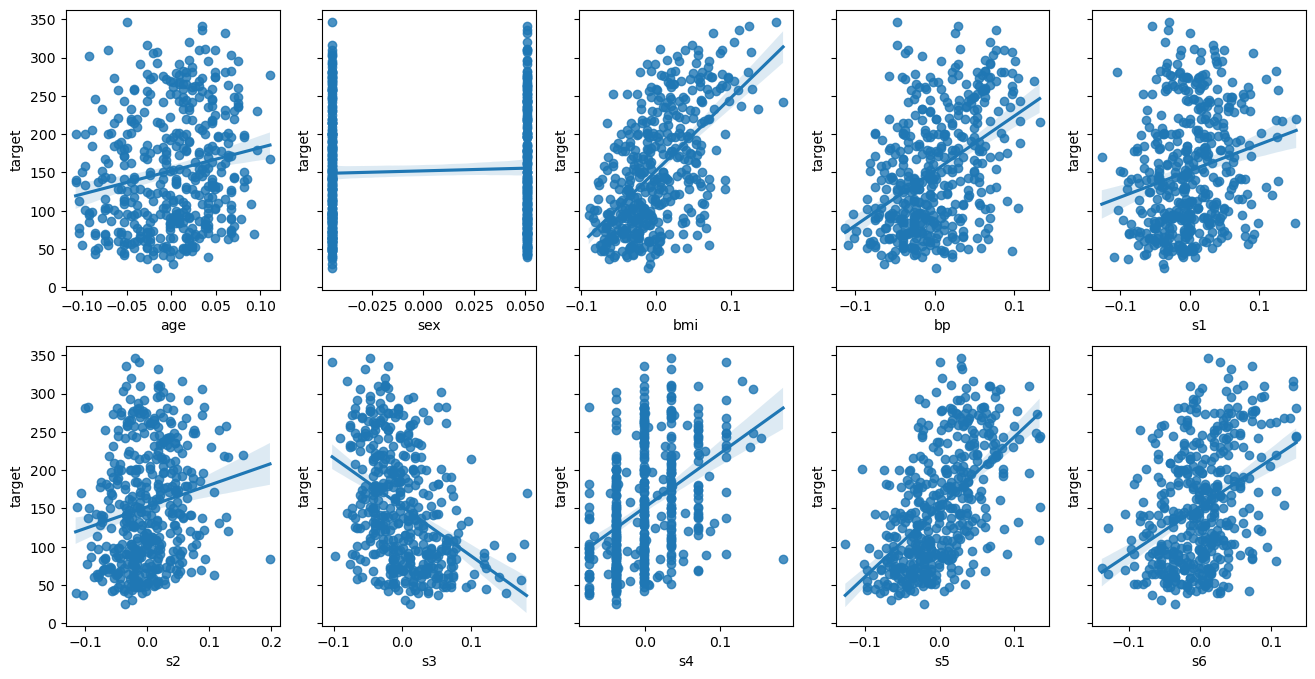

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8), sharey=True)
for i, feature in enumerate(diab.feature_names):
    row, col = i // 5, i % 5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

- 10개 feature의 R squared 값

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
for feature in diab.feature_names:
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, diab.target)
    score = lr.score(X, diab.target)
    print(f'{feature}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


### BMI vs target

In [11]:
# 훈련/테스트 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1, 1), diab.target, test_size=0.2, random_state=2023
)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# 가중치, 바이어스
lr.coef_, lr.intercept_

(array([934.31985305]), 152.34582045693807)

In [15]:
X_test[0], y_test[0]

(array([0.01858372]), 265.0)

In [16]:
y_hat = lr.predict(X_test[0].reshape(1,-1))
y_hat[0]

169.70896232582598

In [17]:
y_hat = lr.predict(X_test)
for ii in range(10):
    print(f'실제값: {y_test[i]},\t예측값: {y_hat[i]:.2f}')

실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90
실제값: 317.0,	예측값: 196.90


- SVR

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv


0.21771444515616456

- Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf =rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.18878931648292208

- XGBoost

In [23]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xgb = xgbr.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.16112417529264378

- Linear Regression

In [24]:
r2_lr = r2_score(y_test, y_hat)
mse_lr = mean_squared_error(y_test, y_hat)

In [25]:
print('\t\tLR\tSVM\tRF\tXGBoost')
print(f'R Squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}') 
print(f'MSE\t\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xgb:.2f}')

		LR	SVM	RF	XGBoost
R Squared	0.3017	0.2177	0.1888	0.1611
MSE		4885.23	5473.17	5675.54	5869.10


In [26]:
rf = pd.DataFrame({
    'y':y_test, 'LR':y_hat, 'Sv':y_hat_sv, 'RF':y_hat_rf, 'XGBoost':y_hat_xgb}
)
rf.head(10)

,y,LR,Sv,RF,XGBoost
0,265.0,169.708962,156.749747,175.914528,192.845566
1,261.0,232.144278,173.753474,296.205944,301.475983
2,160.0,124.393007,119.485381,104.382341,104.967331
3,249.0,157.624708,146.784213,168.856028,168.496536
4,102.0,110.294710,114.126114,88.030960,90.249809
5,200.0,239.193426,172.932418,173.025000,133.411819
6,42.0,101.231519,113.664480,100.627667,101.205879
7,55.0,89.147265,116.395837,72.232190,72.271255
8,178.0,113.315774,114.804048,123.449615,119.802994
9,317.0,196.898535,170.656970,220.023333,248.039322
